In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Supermaket

In [4]:
np.random.seed(42)
n_products = 1000
product_prices = np.random.normal(loc=50,scale=15,size=n_products)
units_sold = np.random.poisson(lam=30,size=n_products)

ratings_raw = np.random.normal(loc=4,scale=0.8,size=n_products)
customer_ratings = np.clip(np.round(ratings_raw),1,5).astype(int)

categories = ['Home Decor','Kitchen Ware','Bedding','Bath']
product_categories = np.random.choice(categories,size=n_products)

discounts = np.random.exponential(scale=0.1,size=n_products)
discounts = np.clip(discounts,0,1)

dataset_df = pd.DataFrame({
    'Price':product_prices,
    'Units_Sold':units_sold,
    'Customer_Ratings':customer_ratings,
    'Categories':product_categories,
    'Discounts':discounts
})


In [8]:
dataset_df.head()

,Price,Units_Sold,Customer_Ratings,Categories,Discounts
0,57.450712,24,5,Bedding,0.084236
1,47.926035,32,4,Kitchen Ware,0.099892
2,59.715328,18,5,Kitchen Ware,0.073136
3,72.845448,33,4,Home Decor,0.005252
4,46.487699,34,4,Bedding,0.026508


In [6]:
dataset_df.describe()

,Price,Units_Sold,Customer_Ratings,Discounts
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.289981,29.934000,3.939000,0.100070
std,14.688239,5.568362,0.802448,0.101277
min,1.380990,14.000000,2.000000,0.000393
25%,40.286145,26.000000,3.000000,0.027900
50%,50.379509,30.000000,4.000000,0.069464
75%,59.719158,34.000000,5.000000,0.136824
max,107.790972,50.000000,5.000000,0.752520


In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1000 non-null   float64
 1   Units_Sold        1000 non-null   int32  
 2   Customer_Ratings  1000 non-null   int32  
 3   Categories        1000 non-null   object 
 4   Discounts         1000 non-null   float64
dtypes: float64(2), int32(2), object(1)
memory usage: 31.4+ KB


In [10]:
numeric_df = dataset_df.select_dtypes(include=[np.number])

In [17]:
numeric_df.mean()

Price               50.289981
Units_Sold          29.934000
Customer_Ratings     3.939000
Discounts            0.100070
dtype: float64

In [14]:
numeric_df.median()

Price               50.379509
Units_Sold          30.000000
Customer_Ratings     4.000000
Discounts            0.069464
dtype: float64

In [15]:
dataset_df['Categories'].value_counts()

Categories
Kitchen Ware    258
Bath            251
Home Decor      250
Bedding         241
Name: count, dtype: int64

In [18]:
## 2. 

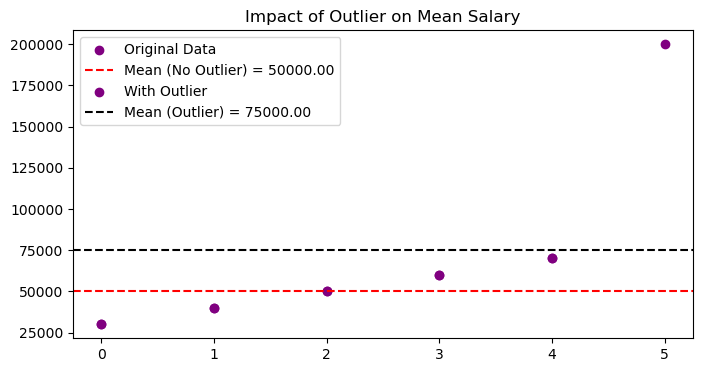

In [20]:
salaries = np.array([30000,40000,50000,60000,70000])
mean_normal = np.mean(salaries)

salaries_outliers = np.append(salaries,200000)
mean_outlier = np.mean(salaries_outliers)

plt.figure(figsize=(8,4))
plt.scatter(range(len(salaries)),salaries,color='purple',label='Original Data')
plt.axhline(mean_normal,color='red',linestyle='--',label=f'Mean (No Outlier) = {mean_normal:.2f}')

plt.scatter(range(len(salaries_outliers)),salaries_outliers,color='purple',label='With Outlier')
plt.axhline(mean_outlier,color='black',linestyle='--',label=f'Mean (Outlier) = {mean_outlier:.2f}')

plt.title('Impact of Outlier on Mean Salary')
plt.legend()
plt.show()

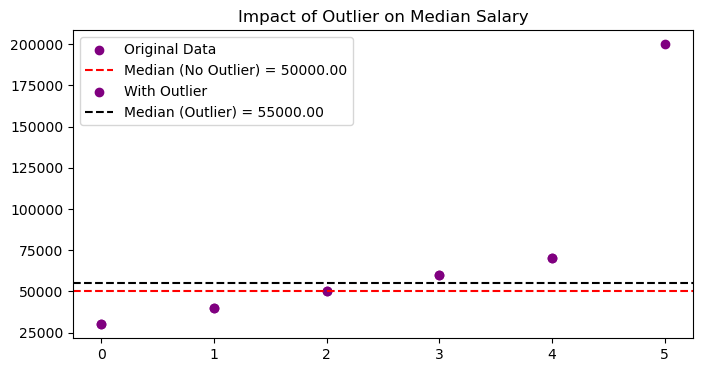

In [21]:
salaries = np.array([30000,40000,50000,60000,70000])
median_normal = np.median(salaries)

salaries_outliers = np.append(salaries,200000)
median_outlier = np.median(salaries_outliers)

plt.figure(figsize=(8,4))
plt.scatter(range(len(salaries)),salaries,color='purple',label='Original Data')
plt.axhline(median_normal,color='red',linestyle='--',label=f'Median (No Outlier) = {median_normal:.2f}')

plt.scatter(range(len(salaries_outliers)),salaries_outliers,color='purple',label='With Outlier')
plt.axhline(median_outlier,color='black',linestyle='--',label=f'Median (Outlier) = {median_outlier:.2f}')

plt.title('Impact of Outlier on Median Salary')
plt.legend()
plt.show()

## Median is less sensitive for outlier

In [22]:
dataset_df['Customer_Ratings'].mode()

0    4
Name: Customer_Ratings, dtype: int32

In [24]:
maxi = dataset_df['Customer_Ratings'].max()
mini = dataset_df['Customer_Ratings'].min()
rating_range = maxi-mini
maxi,mini,rating_range

(5, 2, 3)

In [25]:
dataset_df['Price'].var()

215.74436705664803

In [26]:
dataset_df['Price'].std()

14.688239072695135

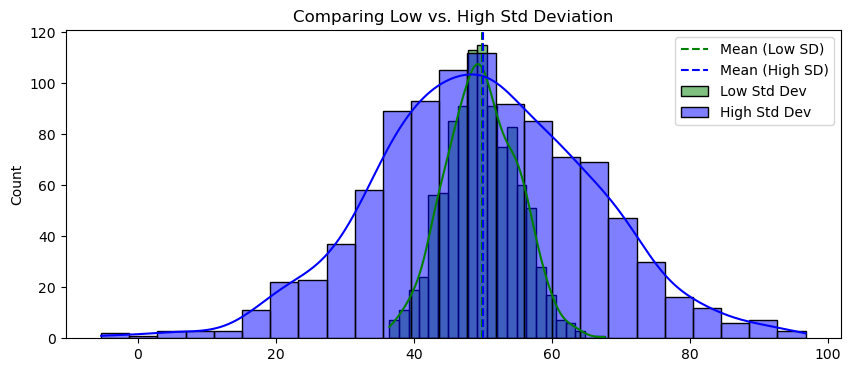

In [28]:
data_low_std = np.random.normal(50,5,1000)
data_high_std = np.random.normal(50,15,1000)

plt.figure(figsize=(10,4))

sns.histplot(data_low_std,color='green',kde=True,label='Low Std Dev')
sns.histplot(data_high_std,color='blue',kde=True,label='High Std Dev')
plt.axvline(np.mean(data_low_std),color='green',linestyle='--',label='Mean (Low SD)')
plt.axvline(np.mean(data_high_std),color='blue',linestyle='--',label='Mean (High SD)')
plt.title('Comparing Low vs. High Std Deviation')
plt.legend()
plt.show()

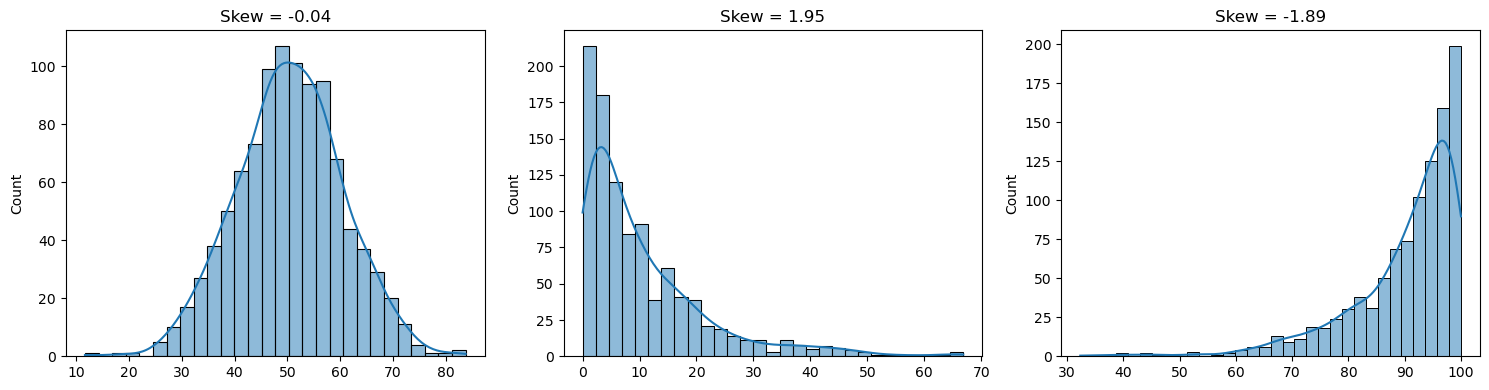

In [29]:
data_sym = np.random.normal(50,10,1000)
data_right = np.random.exponential(10,1000)
data_left = -np.random.exponential(10,1000) + 100

plt.figure(figsize=(15,4))
for i , data in enumerate([data_sym,data_right,data_left],1):
    plt.subplot(1,3,i)
    sns.histplot(data,kde=True)
    plt.title(f'Skew = {pd.Series(data).skew():.2f}')
plt.tight_layout()
plt.show()

In [30]:
## 3.

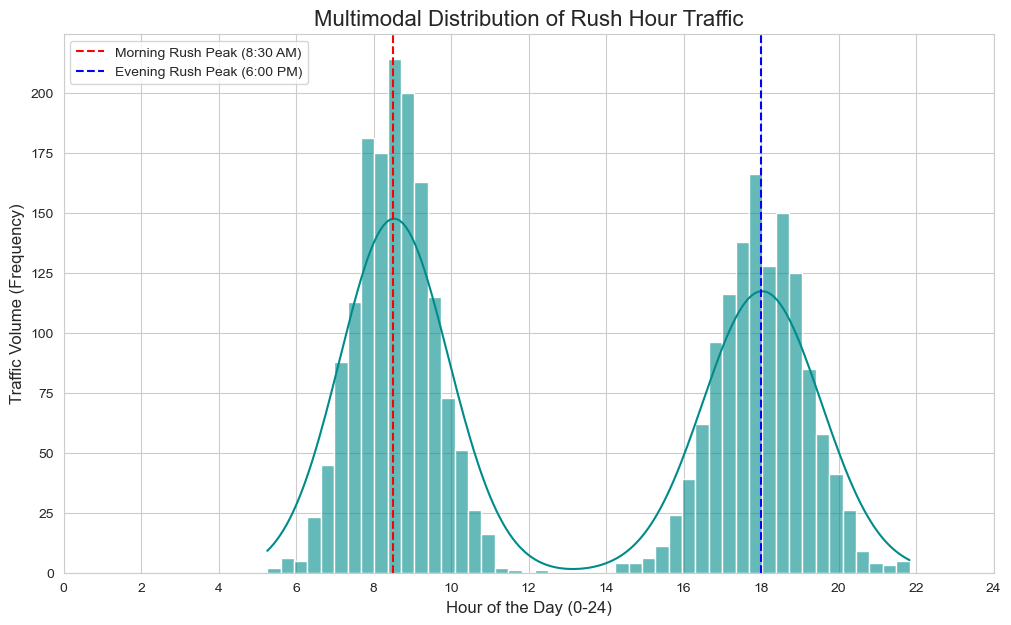

In [38]:
np.random.seed(42)
morning_peak = np.random.normal(loc=8.5, scale=1, size=1500)  # 8:30 AM
evening_peak = np.random.normal(loc=18, scale=1.2, size=1300)   # 6:00 PM
traffic_data = np.concatenate((morning_peak, evening_peak))

# --- 1. Clip the data to stay within the 24-hour cycle (0 to 24)
traffic_data = np.clip(traffic_data, 0, 24)

# --- 2. Plot the Histogram and KDE ---
# Set the style for the plot
sns.set_style("whitegrid")

# Create the plot figure
plt.figure(figsize=(12, 7))

# Plot the histogram and the Kernel Density Estimate (KDE)
sns.histplot(traffic_data, bins=48, kde=True, color='darkcyan', alpha=0.6)

# --- 3. Customize the Plot for Clarity ---
# Add titles and labels
plt.title('Multimodal Distribution of Rush Hour Traffic', fontsize=16)
plt.xlabel('Hour of the Day (0-24)', fontsize=12)
plt.ylabel('Traffic Volume (Frequency)', fontsize=12)

# Set x-axis ticks to be more readable (e.g., every 2 hours)
plt.xticks(np.arange(0, 25, 2))

# Add vertical lines to show the mean of each rush hour peak
plt.axvline(8.5, color='red', linestyle='--', label='Morning Rush Peak (8:30 AM)')
plt.axvline(18.0, color='blue', linestyle='--', label='Evening Rush Peak (6:00 PM)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [40]:
Q1 = dataset_df['Units_Sold'].quantile(0.25)
Q3 = dataset_df['Units_Sold'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
IQR,lower_bound,upper_bound

(8.0, 14.0, 46.0)

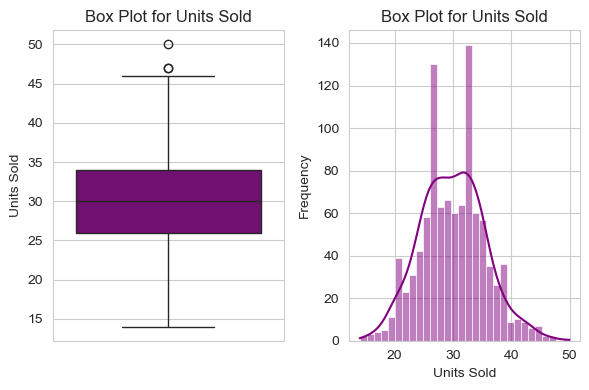

In [54]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.boxplot(data=dataset_df['Units_Sold'],color='purple')
plt.title('Box Plot for Units Sold')
plt.ylabel('Units Sold')
plt.subplot(1,2,2)
sns.histplot(x=dataset_df['Units_Sold'],bins=30,kde=True,color='purple')
plt.title('Box Plot for Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

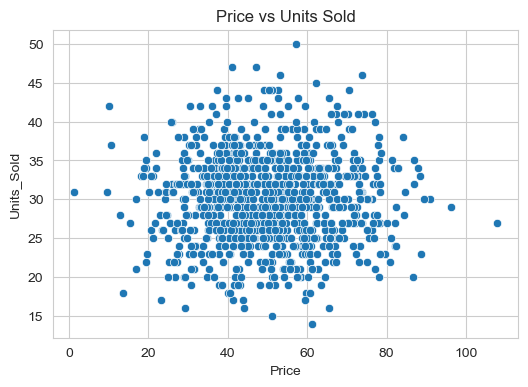

0.029538213576692455

In [55]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price',y='Units_Sold',data=dataset_df)
plt.title('Price vs Units Sold')
plt.show()

corr_value = dataset_df['Price'].corr(dataset_df['Units_Sold'])
corr_value